<a href="https://colab.research.google.com/github/ashikshafi08/PawPularity_Kaggle/blob/main/TensorFlow/nbs/Pawpularity_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pawpularity TensorFlow Implementation
This notebook will contain the TensorFlow code for the PawPularity Competition, previously we got ourselves into Top 100 with the help of Fastai but now I want to see how far I can go with TensorFlow. 

I am going to try the following things, 
- Use model subclassing when in need 
- Try out vision transformer 
- Try out EANet (this replaces the self attention) 
- 

## Getting the data ready 

In [ ]:
# Importing the google drive 
from google.colab import drive 
drive.mount('/content/drive')

# Importing the needed packages 
import tensorflow as tf 
import tensorflow_hub as hub 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras import layers 

# Installing tensorlfow addons 
!pip install tensorflow_addons 
import tensorflow_addons as tfa

Mounted at /content/drive
     |████████████████████████████████| 1.1 MB 6.0 MB/s 


In [ ]:
# Specifying the data paths 
train_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train/'
test_image_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test/'

train_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/train.csv'
test_df_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/test.csv'
sample_sub_path = '/content/drive/MyDrive/Kaggle_Competition/petfinder-pawpularity-score/sample_submission.csv'


# Loading in the data paths 


train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
sample_sub_df = pd.read_csv(sample_sub_path)

train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [ ]:
# Append the full path 
def append_ext(fn , train = True):
  if train:
    return f'{train_image_path}{fn}.jpg'
  else:
    return f'{test_image_path}{fn}.jpg'

# Applying the above function on our dataframe 
train_df['full_path'] = train_df['Id'].apply(lambda x: append_ext(x))
test_df['full_path'] = test_df['Id'].apply(lambda x: append_ext(x , train = False))

train_df.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,full_path
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,/content/drive/MyDrive/Kaggle_Competition/petf...
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,/content/drive/MyDrive/Kaggle_Competition/petf...
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,/content/drive/MyDrive/Kaggle_Competition/petf...
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,/content/drive/MyDrive/Kaggle_Competition/petf...
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,/content/drive/MyDrive/Kaggle_Competition/petf...
5,001dd4f6fafb890610b1635f967ea081,0,0,1,0,0,0,0,0,0,0,0,1,74,/content/drive/MyDrive/Kaggle_Competition/petf...
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22,/content/drive/MyDrive/Kaggle_Competition/petf...
7,0031d6a9ef7340f898c3e05f92c7bb04,0,1,1,0,0,0,1,1,0,0,1,0,35,/content/drive/MyDrive/Kaggle_Competition/petf...
8,0042bc5bada6d1cf8951f8f9f0d399fa,0,1,1,1,0,0,0,0,0,0,0,0,53,/content/drive/MyDrive/Kaggle_Competition/petf...
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21,/content/drive/MyDrive/Kaggle_Competition/petf...


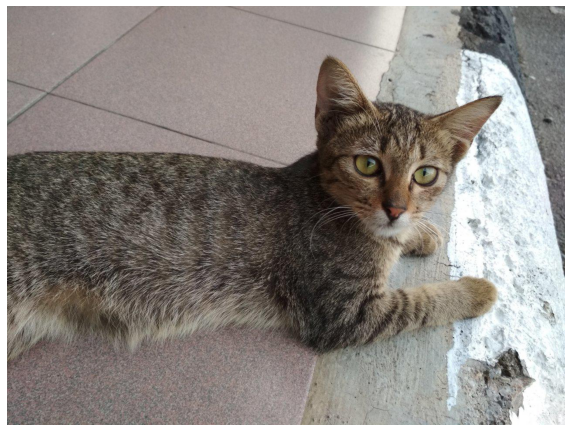

In [ ]:
# Displaying random images of pets 
import matplotlib.image as mpimg 
import random 
from matplotlib.pyplot import figure 
random_index = random.randrange(len(train_df['full_path'].tolist())) 

train_fns = train_df['full_path'].tolist()
train_labels = train_df['Pawpularity'].to_list()


random_filename = train_fns[random_index]
random_label = train_labels[random_index]

# Plotting the image 
im = mpimg.imread(random_filename)
figure(figsize = (10 , 8))
plt.imshow(im)
plt.axis('off');

In [ ]:
train_df.head()

##1. Own Flavours of Multi-modal model (positional encoding)

Things to do: 
- Use the EfficientNetB0 as the image feature extractor
- Make use of the other features as positional encoding. 
- See if there should be used differente losses (classification + regression) 

In [ ]:
# Getting the EfficientNetB0 base model 
input_shape = (224 , 224 ,3)
#base_model = tf.keras.applications.EfficientNetB0(include_top= False)

# Freeze the base model layers 
#base_model.trainable = False 


In [ ]:
# Get the image data 
def load_img(file_path , label):
  im = tf.io.read_file(file_path)
  im = tf.image.decode_jpeg(im , channels = 3)
  im = tf.image.convert_image_dtype(im , tf.float32)
  im = tf.image.resize(im , size = (224 , 224))
  im = im / 255.
  return im , label


Building the model with the following features, 
- Subject Focus (one hot encoded)
- Eyes (one hot encoded) 
- Human (one hot encoded) 
- Pawpularity (the label itself) 
- full_path (locate the images) 

In [ ]:
# Buildin the model (no idea)

# Getting the image data 
img_inputs = layers.Input(shape = input_shape , name = 'Input layer')


In [ ]:
# Building Image Feature Vector 
def image_feature_vector(input_shape , units):

  inputs = layers.Input(shape = input_shape , name = 'Input layer')
  x = base_model(inputs , training = False)
  x = layers.GlobalAveragePooling2D(name = 'pooling_layer')(x)
  x = layers.Dense(units , activation= 'relu')(x)

  # Packing into a feature vector model 
  feat_model = tf.keras.Model(inputs , x)
  return feat_model


Whats next? 

We got the image feature vector which has the image representation as a vector, the next thing will be trying to tweak in the one hot encoding features and see if they can increase the performance of the model. 

This is going to be bit tricky tho.


```
img_feature vector -> eyes feat vector -> rest all the feature vector -> concatenate the all the outputs -> some more additional layers on top of the feature vectors -> dropout -> output layer (linear tho) -> Pack into a model 


```


- Image Embedding: This takes in the image, apply the EfficientNet model to our images, gives out the embeddings. 
- PositionalEmbedding: Takes in a one hot encoded and apply dense layer on it, returns back the embeddings. 



[Multi-Input and output in Subclassing](https://stackoverflow.com/questions/59743161/tensorflow-model-subclassing-mutli-input)

In [ ]:
len(train_df.Human)

9912

In [ ]:
class ImageEmbedding(tf.keras.layers.Layer):

  def __init__(self , units, activation , shape , **kwargs):
    super(ImageEmbedding , self).__init__(**kwargs)

    self.units = units 
    self.activation = activation

    self.inp_layer = layers.Input(shape = input_shape , name = 'input_layer')
    self.base_model = tf.keras.applications.EfficientNetB0(include_top= False)
    self.dense = tf.keras.layers.Dense(units = units , activation = activation , name = 'simple_dense_layer')
    self.pooling_layer = layers.GlobalMaxPooling2D()

  def call(self , inputs):
    self.base_model.trainable = False 
    img = inputs[0] # image tensor
    label = inputs[1] # label
    x = self.base_model(img , training = False)
    x = self.pooling_layer(x)
    x = self.dense(x)
    return x ,label


In [ ]:
im = ImageEmbedding(32 , activation= 'relu' , shape = (224 , 224 , 3))
im

In [ ]:
sample_img = load_img(random_filename, random_label)
# Just getting the image
layers.Dense(32 , activation = 'relu')(im(sample_img)[0])

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[2.1715806 , 0.        , 6.4146123 , 2.9807556 , 0.        ,
        3.0207908 , 1.7457154 , 3.377385  , 1.3924663 , 0.        ,
        0.        , 0.        , 5.429345  , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.8152532 ,
        0.        , 0.        , 0.        , 0.18407682, 0.        ,
        0.        , 0.        , 0.        , 4.0722346 , 3.3633564 ,
        0.        , 0.        ]], dtype=float32)>

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
    
    def __init__(self , units , activation , **kwargs):
        super(PositionalEmbedding , self).__init__(**kwargs)

        self.units = units 
        self.activation = activation 

        self.dense = layers.Dense(units , activation , name = 'dense_layer')

    def call(self, inputs):
        x = self.dense(inputs)
        return x 

In [ ]:
# Testing out the above layer
l = PositionalEmbedding(32 , 'relu')
m = tf.one_hot(train_df['Blur'].to_numpy() , depth= 1)
l(m)

<tf.Tensor: shape=(9912, 32), dtype=float32, numpy=
array([[0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194],
       [0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194],
       [0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194],
       ...,
       [0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194],
       [0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194],
       [0.        , 0.        , 0.2683583 , ..., 0.4258104 , 0.        ,
        0.00731194]], dtype=float32)>

In [ ]:
# Converting the other features into one hot encoded representation 
def one_hot_conversion(col_list):
    one_hot = tf.one_hot(col_list, depth = 1 , dtype = tf.int32)
    return one_hot

# Converting only 4 columns for now
eyes_one_hot = one_hot_conversion(train_df.Eyes.tolist())
face_one_hot = one_hot_conversion(train_df.Face.tolist())
near_one_hot = one_hot_conversion(train_df.Near.tolist())
group_one_hot = one_hot_conversion(train_df.Group.tolist())

Using the above layers and combining into a full feledged model! 



In [ ]:
# Data Augmentation layers 
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'), 
    preprocessing.RandomZoom(0.2), 
    preprocessing.RandomRotation(0.3), 
    preprocessing.RandomHeight(0.4), 
    preprocessing.RandomWidth(0.4)
], name ='data_augmentation')


In [ ]:
eyes_one_hot[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>

In [ ]:
image_embed = ImageEmbedding(32 , activation= 'relu' , shape = (224 , 224 , 3))
positional_layer = PositionalEmbedding(32 , 'relu')

In [ ]:
# Building the model 

# Image inputs
input = layers.Input(shape = (224 , 224 , 3))
image_embedding = image_embed(input)
image_embed_model = tf.keras.Model(input , image_embedding)


# Eyes inputs 
eyes_input = layers.Input(shape = (1,), dtype = tf.int32)
eyes_pos_embed = positional_layer(eyes_input)
eyes_output = layers.Dense(32, name = 'eyes_feature')(eyes_pos_embed)
eyes_embed_model = tf.keras.Model(eyes_input , eyes_output)


# Face inputs 
face_input = layers.Input(shape = (1,), dtype = tf.int32)
face_pos_embed = positional_layer(face_input)
face_output = layers.Dense(32 , name = 'face_feature')(face_pos_embed)
face_embed_model = tf.keras.Model(face_input , face_output)

# Combining the inputs 





In [ ]:
* eyes 
* face 
* near 
* group 


# The Plan 

* Concatenate the inputs 
* Different loss functions for different types of inputs (define them via name)